In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

%matplotlib inline

Importing the data as a Pandas Dataframe.

In [3]:
data = pd.read_csv('conversion_data.csv')
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


Checking for missing values in the Dataset

In [4]:
Missing = data.isnull().sum()
Missing

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

Understanding the relationship between different variables using (Heatmaps)

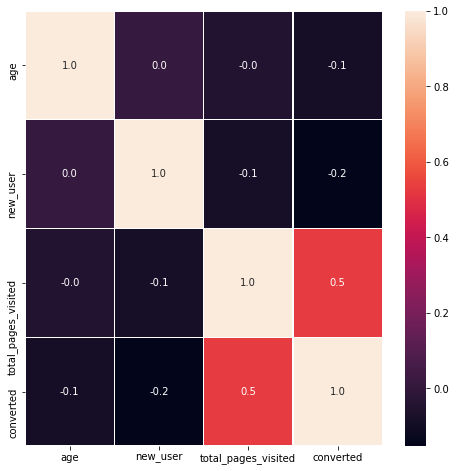

In [5]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot = True,linewidths = 0.2,fmt = '.1F')
plt.show()

Since, the caregorical variables like : Country , Source are not included in the heatmps we have to consider some other kind of data visualization for these Categorical Variables

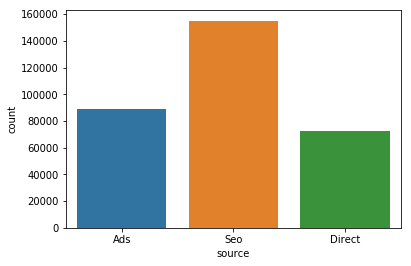

In [6]:
sns.countplot(data=data,x='source')
plt.show()

Looking at this graph we can clearly see , the most important source for calculating our conversion is SEO followed by AD's and Direct marketing.

# To check if the data has a balanced class level ( Highly Imbalanced Class)

0    306000
1     10200
Name: converted, dtype: int64

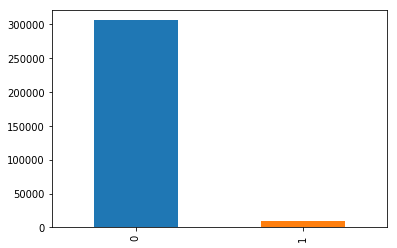

In [7]:
count = pd.value_counts(data['converted'], sort = True).sort_index()
count.plot(kind = 'bar')
count

# Converting categorical varaiables into numeric value in order to use ML algorithims


First let's convert the caregorical variables into numerical values using Label Encoder

In [26]:
var_x = ['country','source']
le = LabelEncoder()
for i in var_x:
    data[i]=le.fit_transform(data[i])

In [27]:
data

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,0,1,0
1,3,23,1,2,5,0
2,3,28,1,2,4,0
3,0,39,1,2,5,0
4,3,30,1,2,6,0
5,3,31,0,2,1,0
6,0,27,1,2,4,0
7,3,23,0,0,4,0
8,2,29,0,1,4,0
9,3,25,0,0,2,0


In [34]:
data['country'].value_counts()


3    178092
0     76602
2     48450
1     13056
Name: country, dtype: int64

In [35]:
data['source'].value_counts()

2    155040
0     88740
1     72420
Name: source, dtype: int64

# Cross Validation

In [64]:
y = data['converted']


In [118]:
X = data[['country','age','new_user','source','total_pages_visited']]



In [119]:
X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size=0.4,random_state=0)

X_train

,country,age,new_user,source,total_pages_visited
40702,3,32,1,2,7
26944,3,35,1,0,1
3479,3,18,1,2,2
154207,0,30,0,1,17
48665,3,28,1,1,2
85832,3,28,1,2,1
298383,3,47,1,1,7
49116,3,30,1,0,5
68519,3,34,1,2,3
202052,3,32,0,1,6


In [69]:
#rf = RandomForestClassifier(criterion='entropy')
#rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)


/Users/rohankochhar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# After fitting a random forest model to the data , we will calaculate feature important scores

In [71]:
#feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
#feature_imp

total_pages_visited    0.775019
age                    0.107351
country                0.055408
new_user               0.044433
source                 0.017788
dtype: float64

# Visualizing Feature importance

No handles with labels found to put in legend.


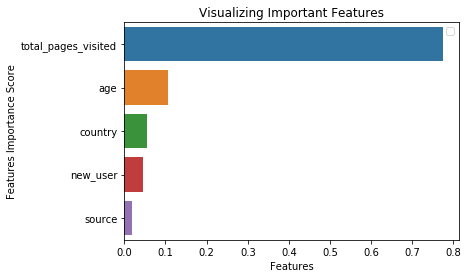

In [73]:
#sns.barplot(x=feature_imp, y=feature_imp.index)
#plt.xlabel('Features')
#plt.ylabel('Features Importance Score')
#plt.title("Visualizing Important Features")
#plt.legend()
#plt.show()

# Accuarcy of Our Current model

In [76]:
print("Random Forest Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Random Forest Accuracy:  0.9835547122074636


# Logistic Regression



In [99]:
LR = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
LR
y_pred = LR.predict(X_test)
print("Logistic Regression Score",LR.score(X_train,y_train))
print("Logistic Regression Accuracy ",metrics.accuracy_score(y_pred,y_test))


Logistic Regression Score 0.9848355471220747
Logistic Regression Accuracy  0.9840607210626185


# Decision Tree model

In [94]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision Trees's Accuracy:  0.9749762808349146


# Evaluating Accuracy Using Confusion Matrix

In [98]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    122342
           1       0.85      0.63      0.72      4138

   micro avg       0.98      0.98      0.98    126480
   macro avg       0.92      0.81      0.86    126480
weighted avg       0.98      0.98      0.98    126480



# Partial Dependence Plot

/Users/rohankochhar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


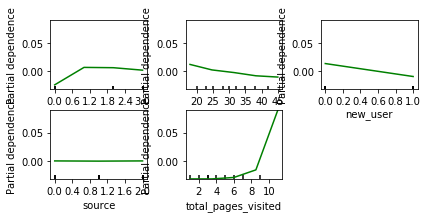

In [132]:
def get_some_data():
    cols_to_use = ['country','age','new_user','source','total_pages_visited']
    X = data[cols_to_use]
    y = data['converted']
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X,y

X,y = get_some_data()
model = GradientBoostingRegressor()
model.fit(X,y)

my_plots = plot_partial_dependence(model,       
                                   features=[0, 1, 2, 3, 4], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['country','age','new_user','source','total_pages_visited'], # labels on graphs
                                   grid_resolution=5) # number of values to plot on x axis
    
    
    

# Conclusion

After applying Machine learning models on the data we came to the conclusion that given that we had a binary taget variable it shows that Logistic Regression model was fit best to the data . We got an accuarcy of 98.406% where as other models like Random Forests and Decison trees gave strong accuracy levels too but, we achieved higher levels with Logistic Regression.

For evaluating the accuracy we used a confusion matrix which gave us a high precision as well as recall rate for predicting the customer churn. We achieved a weighted accuracy of 98%. The f score for predicting "Yes" for a conversion rate is "72%" which is significantly less as comapred to 98% for "No". One reason for this can be the fact that this data has highly imbalanced class. The data is very heavily about " Users not converting" i.e. "0".

Looking at the Partial Dependence plot we can see how conversion rate increases with the increase in the "total_pages_visited". We also noticed how factors like "source" dosen't give enough information for us to make some predictions about the conversion rate. On the other hand we observed how young users were the ones who were converting more as compared to old users. Gathering more data would help condcuting further research for reducing our costs on Ads.

To sum it all up, we made a classifier using Logistic Regression which would predict whether the conversion rates for new customers with an accuracy of about 98.407%. For,the marketing teams we would advise to conduct A/B test on the website as to see why the older users are not able to work well on the website. Some changes in the User interface of the website might help with this.